# Correlation and Autocorrelation

In [ ]:
#Changing an index to datetime
df.index = pd.to_datetime(df.index)

#Plotting data
df.plot()    #df.plot(grid = True)

#Join two dataframes
df1.join(df2)  #df1.join(df2, how='inner') to get only the common dates

#Computing differences and percent changes of a time series
df['col'].diff()
df['col'].pct_change()

#pandas correlation method of Series
df['ABC'].corr(df['XYZ'])

#Dates when one time series ts1 has data whereas the other ts2 hasn't
set_ts1 = set(ts1)
set_ts2 = set(ts2)
print(set_ts1 - set_ts2)

### Correlation of two time series

In [ ]:
#For stock prices of 2 companies (2 series), we should compare correlations of their returns and not prices 
#since their price levels can differ but they may vary together

df['ts1_ret'] = df['ts1_prices'].pct_change()
df['ts2_ret'] = df['ts2_prices'].pct_change()

#Visualise correlation via scatterplot
plt.scatter(df['ts1_ret'], df['ts2_ret'])
plt.show()

#Correlation
correlation = df['ts1_ret'].corr(df['ts2_ret'])

### Simple linear regression

Multiple Python packages to perform linear regression

In [ ]:
#In statsmodels
import statsmodels.api as sm
sm.OLS(y,x).fit()

#In numpy
import numpy as np
np.polyfit(x, y, deg=1)

#In pandas
import pandas as pd
pd.ols(y, x)

#In scipy
from scipy import stats
stats.linregress(x, y)

In [ ]:
#Regression of series 1 returns on series 2 returns

import statsmodels.api as sm
df['s1_ret'] = df['s1_price'].pct_change()
df['s2_ret'] = df['s2_price'].pct_change()

#Add a constant to the dataframe for the intercept term (this will add another column of 1's)
df = sm.add_constant(df)
#if we don't add this the linear regression will assume that there is no constant term and will assume it to be 0

#First row is NaN, so we need to remove it
df = df.dropna() #this will remove all NA's from the dataframe

#Run the regression
results = sm.OLS(df['s1_ret'], df[['const', 's2_ret']]).fit()
results.summary()

#Regression output

#Intercept
results.params[0]

#Slope
results.params[1]

#R squared like correlation measures how well the linear regression line fits the data

Relationship between R-squared and correlation

In [ ]:
#The magnitude of correlation is the square root of R-squared
# corr(x,y) ^ 2 = R ^ 2

#The sign of correlation is the sign of the regression slope
# sign(corr) = sign(regression slope)

### Autocorrelation

In [ ]:
#It's a correlation of a time series with a lagged copy of itself
#It's also called serial correlation
#Often when we say series autocorrelation we mean "Lag-one autocorrelation"

Interpretation of Autocorrelation

In [ ]:
#Mean reversion
#If the auto correlation is negative then we say it is Mean reverting

#Momentum or Trend Following
#we call this when it is positive autocorrelation

In [ ]:
#Convert index to datetime
df.index = pd.to_datetime(df.index)

#Downsample from daily to monthly data
df = df.resample(rule = 'M', how = 'last') #M means monthly, A - annualy, W - weekly 
#we can use first, last or average in how
#argument how in resample has been deprecated, so use .resample(---).last()

#Compute returns from prices
df['return'] = df['price'].pct_change()

#Compute autocorrelation
autocorrelation = df['return'].autocorr()

# Some simple time series models

### Autocorrelation function

In [ ]:
#Autocorrelation function (ACF): Autocorrelation as a function of the lag (lags on x-axis and autocorrelation on y-axis)

#Any significant non-zero autocorrelations implies that the series can be forecast from the past
#Example if lag 1 and lag 2 autocorrelations differ from zero then we can use last 2 values in series for forecasting

#There can be a pattern in autocorrelation.
#Example for seasonal graphs (quarterly) significant autocorrelations can be seen at lags 3,6,9 etc.

#ACF can also be used for selecting a parsimonious model for fitting a data
#Parsimonious models are simple models with great explanatory predictive power
#Example: pattern for autocorrelation can suggest a model for the series

Plot ACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(x, lags=20, alpha=0.05) 
#x here is a dataframe with one column and with datetime indexed
#alpha argument sets the width of the confidence interval
#example: alpha 0.05
# 5% chance that if true autocorrelation is zero, it will fall outside blue band

#Confidence bands are wider if:
## alpha is lower
## fewer observations

#Even if the true autocorrelations were zero at all lags, 
#in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. 
#In fact, the standard deviation of the sample autocorrelation is 1/square root of N 
#where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, 
#and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, 
#the 95% confidence interval is +- 1.96/square root of N. 
#This approximation only holds when the true autocorrelations are all zero.

#If you want no bands on plot, set alpha = 1

#Besides plotting ACF, we can also extract it's numerical values
from statsmodels.tsa.stattools import acf
print(acf(x))

In [ ]:
#returns of Microsoft is pre-loaded in a DataFrame called returns.

# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

### White Noise

In [ ]:
#White noise is a series with:
## Constant mean
## Constant variance
## Zero autocorrelations at all lags

#Special case: if data has White noise but has normal distribution then Gaussian White Noise

Simulating white noise

In [11]:
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500) 

#loc here is mean
#scale is standard deviation

print(np.mean(noise), np.std(noise))

0.06364726725740451 0.9550987544979985


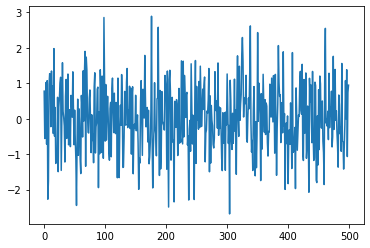

In [4]:
#Plot of white noise
import matplotlib.pyplot as plt
plt.plot(noise)
plt.show()

In [ ]:
#All autocorrelations of white noise is zero
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
x = plot_acf(noise, lags=50)

In [ ]:
#A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. 
#Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based 
#on the past - autocorrelations at all lags are zero.

#White noise can be stock returns with mean 2% returns (0.02) and standard deviation 5% (0.05)

### Random walk

In [ ]:
#In a random walk, todays price is equal to yesterday's price plus some noise
# P(t) = P(t-1) + e(t)

#Change in price is white noise
# P(t) - P(t-1) = e(t)

#If prices are in logs then difference in log prices are one way to measure returns
#If stock prices follow random walk then stock returns are white noise

#We can't forecast a random walk
#Best forecast for tomorrow's price is today's price

In [ ]:
#Random walk with drift (prices on average drift by u every period)

# P(t) = P(t-1) + e(t) + u         e is epsilon, u is mu

#Change in price is white noise with non-zero mean (with mean = u)
# P(t) - P(t-1) = u + e(t)

Statistical test for Random walk

In [ ]:
#To test whether a series (like stock prices) follow a random walk, we can regress the current price with the previous price
#If the slope coefficient beta is not significantly different from 1 then we cannot reject the null hypothesis that
#the series is a random walk

#Ideal way for testing this is below (this is called Dickey-Fuller test)
# P(t) - P(t-1) = a + b * P(t-1) + e(t)
# Instead of slope coefficient as 1, here we will test whether it is 0
# Test: Ho: b(beta) = 0 (random walk)    H1: b < 0 (not random walk)

#If we add more lagged prices on the right hand side then it is called Augmented Dickey-Fuller test

ADF test (Augmented Dickey-Fuller test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df['Adj Close'])
print(results) 
#results include the test statistic, the p-value, the number of observations 
#and the critical values for tests with 1%, 10%, and 5% levels

#test statistic
results[0]

#p-value
results[1]

#if p value is less than 5% (0.05) we can reject the null hypothesis that the series is a random walk with 95% confidence

Generate a Random Walk

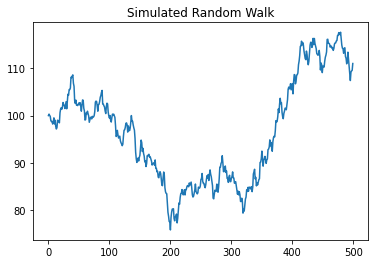

In [12]:
#Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. 
#In other words, today's price is yesterday's price plus some random noise.

#simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

Generate Random Walk with drift

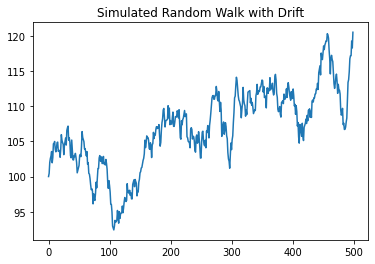

In [13]:
#Many time series, like stock prices, are random walks but tend to drift up over time.

#In the previous example, the noise in the random walk was additive: random, normal changes in price were added to 
#the last price. However, when adding noise, you could theoretically get negative prices. 
#Now we will make the noise multiplicative: we will add one to the random, normal changes to get a total return, 
#and multiply that by the last price.

# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### Stationarity

In [ ]:
#Strong stationarity
## entire distribution of data is time-invariant

#Weak stationarity
## mean, variance and autocorrelation are time-invariant, i.e.,
## for autocorrelation, corr(X(t), X(t-T)) is only a function of T (tau) i.e. lags and not time

# If a process is not stationary then estimation is difficult since
# the parameters will vary with time and then it will be too many parameters to estimate

# Stationarity is necessary for a parsimonious model (with a few parameters to estimate)

#Examples of non-stationary series
## Random walk (since variance will vary with time)
## Seasonality in series (since mean varies with time of the year)
## Change in mean or standard deviation over time

Transforming Nonstationary series into Stationary series

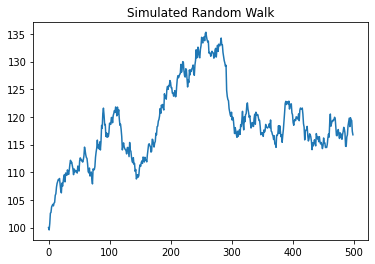

In [22]:
#Random walk 
## Random walk is nonstationary but if we take the first difference then it is White noise which is stationary

steps = np.random.normal(loc=0, scale=1, size=500)
steps[0]=0
P = 100 + np.cumsum(steps)
df = pd.DataFrame(P, columns = ['P'])
plt.plot(df)
plt.title("Simulated Random Walk")
plt.show()

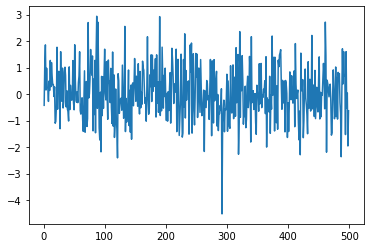

In [23]:
plt.plot(df.diff())
plt.show()

In [ ]:
# Similarly for seasonal(quarterly) series (quarterly data and spike in earnings every 4 quarters, i.e., year end) 
#if we take a seasonal difference, i.e., diff of 4 (df.diff(4)) then it will become stationary
#We can check this using ACF as well as we will see high autocorrelation in 4,8,12 lags etc.
#Post taking diff seasonality pattern will be eliminated

# Sometimes we may need to make 2 transformations
# Example: Amazon quarterly revenues (AMZN) - seasonal plus exponentially increasing
## plt.plot(AMZN)
## plt.plot(np.log(AMZN))  #removing exponential component
## plt.plot(np.log(AMZN).diff(4))  #removing both exponential component and seasonal differences

# Autoregressive (AR) Models

### Describe AR model

In [ ]:
#Mathematical description of AR(1) model

# R(t) = u + phi * R(t-1) + e(t)       # u is a mean, e is noise

# Since there's only one lagged value on the right hand side, this is called
## AR model of order 1, or AR(1) model

# If the AR parameter phi is = 1 then the process is a random walk
# If phi = 0 then the process is white noise

# In order for the process to be stable and stationary phi has to be between -1 and + 1
##  -1 < phi < +1

# If phi is -ve: Mean Reversion
# If phi is +ve: Momentum

In [ ]:
#Higher order AR models

## AR(2) model
## R(t) = u + phi1 * R(t-1) + phi2 * R(t-2) + e(t)

## AR(3) model
## R(t) = u + phi1 * R(t-1) + phi2 * R(t-2) + phi3 * R(t-3) + e(t)

Simulating an AR Process

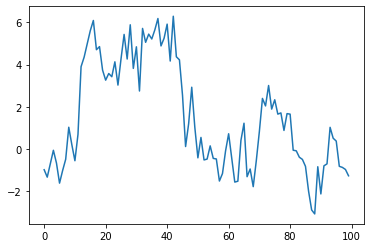

In [30]:
#statsmodels provides modules for simulating the AR process
from statsmodels.tsa.arima_process import ArmaProcess

#define order and parameters of the AR process

ar = np.array([1, -0.9]) 
#we must include the 0 lag coefficient of 1
#the sign of the second parameter is opposite, example, if phi in AR(1) process is +0.9 we will write it as -0.9

ma = np.array([1])

AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=100)
plt.plot(simulated_data)
plt.show()

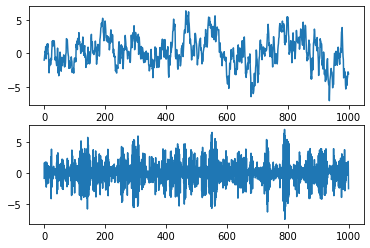

In [33]:
# Plots with different AR parameters

# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

In [ ]:
#Compare the ACF for several AR Time Series

# The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. 
# For example, if the AR parameter, phi = +0.9 , the first-lag autocorrelation will be 0.9, the second-lag will be 0.9^2 = 0.81
# , the third-lag will be 0.9^3 = 0.729 etc. 
# A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, 
# so the first-lag autocorrelation will be -0.9, the second-lag will be (-0.9)^2 = 0.81
# , the third-lag will be (-0.9)^3 = -0.729, etc.

### Estimating and forecasting AR model

Estimating an AR model

In [38]:
#Estimating parameters from data

from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))  
# first parameter (p) in order means AR (1 means AR(1) model, 2 means AR(2) model)
# second parameter (q) in order means MA
result = mod.fit()

print(result.summary())

C:\Users\bansal\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                -154.466
Method:                       css-mle   S.D. of innovations              1.125
Date:                Thu, 15 Apr 2021   AIC                            314.933
Time:                        16:07:24   BIC                            322.748
Sample:                             0   HQIC                           318.096
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1133      1.031      1.080      0.280      -0.907       3.134
ar.L1.y        0.8982      0.042     21.154      0.000       0.815       0.981
                                    Roots           

In [39]:
#If we just need the estimates of u and phi
print(result.params)

[1.1132671  0.89824276]


Forecasting an AR model

C:\Users\bansal\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


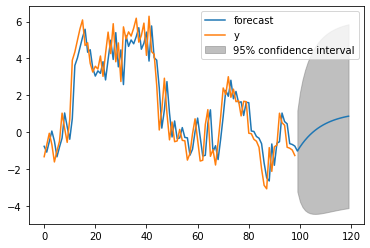

In [45]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order=(1,0))
res = mod.fit()
res.plot_predict(start=1, end=120)
#if the data is indexed on date then we can also use below and mention start and end date
#res.plot_predict(start='2016-07-01', end='2017-06-01')
plt.show()